# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from scipy.stats import linregress
import gmaps
import pandas as pd
from pprint import pprint
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Import API key
from api_keys_mlopez import weather_api_key
from api_keys_mlopez import g_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [8]:
cities[0:8]

['busselton',
 'kahului',
 'port alfred',
 'rikitea',
 'corbelia',
 'saint george',
 'safakulevo',
 'husavik']

In [10]:
#Source:  Burundi lesson
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
#Imperial for a Farenheit reading
units = "imperial"

In [11]:
#Source:  Burundi lesson
# Build query URL and request your results in Celsius
city = "Rikitea"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)

print(weather_response.status_code)

weather_json = weather_response.json()

200


In [78]:
weather_json

{'coord': {'lon': -169.9187, 'lat': -19.0595},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 75.09,
  'feels_like': 76.71,
  'temp_min': 75.09,
  'temp_max': 75.09,
  'pressure': 1011,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 4.61, 'deg': 350},
 'clouds': {'all': 100},
 'dt': 1644168513,
 'sys': {'type': 1,
  'id': 7306,
  'country': 'NU',
  'sunrise': 1644167290,
  'sunset': 1644213566},
 'timezone': -39600,
 'id': 4036284,
 'name': 'Alofi',
 'cod': 200}

In [12]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': -23.1203, 'lon': -134.9692},
 'dt': 1644187117,
 'id': 4030556,
 'main': {'feels_like': 79.3,
          'grnd_level': 1016,
          'humidity': 70,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 79.3,
          'temp_max': 79.3,
          'temp_min': 79.3},
 'name': 'Rikitea',
 'sys': {'country': 'PF', 'sunrise': 1644158579, 'sunset': 1644205500},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 111, 'gust': 19.35, 'speed': 17.92}}


In [45]:
cid = weather_json["id"]
city = weather_json["name"]
cloudiness = weather_json["clouds"]["all"]
country = weather_json["sys"]["country"]

dt = weather_json["dt"]
humidity = weather_json["main"]["humidity"]
lat = weather_json["coord"]["lat"]
lng = weather_json["coord"]["lon"]

max_temp = weather_json["main"]["temp_max"]
wnd_spd = weather_json["wind"]["speed"]
pressure = weather_json["main"]["pressure"]

In [52]:
#Change city from Sindon to Rikitea
lat,lng

(-23.9045, 29.4688)

In [55]:
cities[-8:]

['praia da vitoria',
 'pietersburg',
 'aflu',
 'keta',
 'rocha',
 'dubai',
 'bogorodskoye',
 'grindavik']

In [47]:
lngs = []
lats = []
names = []
countries = []
temps = []
humidities = []
winds = []
clouds = []
pressures = []
dts = []

for city in cities[0:612]:
    
    #Requesting Json
    print(city)
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    print(weather_response.status_code)
    print()
    
    if (weather_response.status_code == 200):
    
    
        #Obtaining weather information
        weather_json = weather_response.json()

        #Results obtained
        cid = weather_json["id"]
        city = weather_json["name"]
        cloudiness = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]

        dt = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]

        max_temp = weather_json["main"]["temp_max"]
        wnd_spd = weather_json["wind"]["speed"]
        pressure = weather_json["main"]["pressure"]

        #Create lists
        lngs.append(lng)
        lats.append(lat)
        names.append(city)
        countries.append(country)
        temps.append(max_temp)
        humidities.append(humidity)
        winds.append(wnd_spd)
        clouds.append(cloudiness)
        dts.append(dt)
        pressures.append(pressure)
        
    time.sleep(1)

busselton
200

kahului
200

port alfred
200

rikitea
200

corbelia
200

saint george
200

safakulevo
200

husavik
200

kedrovyy
200

avarua
200

victoria
200

tuatapere
200

omsukchan
200

kerch
200

gondanglegi
200

torbay
200

umm kaddadah
200

arraial do cabo
200

leningradskiy
200

guerrero negro
200

mataura
200

lavrentiya
200

viedma
200

albany
200

hithadhoo
200

xuddur
200

kenai
200

bluff
200

lodwar
200

tabuk
200

japura
200

punta arenas
200

ushuaia
200

khombole
200

dikson
200

butaritari
200

pangnirtung
200

sentyabrskiy
404

illoqqortoormiut
404

castro
200

ajdabiya
200

lebu
200

straumen
200

saint-philippe
200

naron
200

mandalgovi
200

dingle
200

qaanaaq
200

upernavik
200

cape town
200

pokhara
200

zyryanovsk
200

kazalinsk
404

katsuura
200

alotau
404

nantucket
200

yumen
200

cockburn harbour
404

kamenka
200

alekseyevsk
200

hermanus
200

kaitangata
200

belushya guba
404

manado
200

new norfolk
200

nikolskoye
200

gayeri
200

lata
200

jamestown


200

tommot
200

rio gallegos
200

gazanjyk
200

vredendal
200

arvika
200

dubrovnik
200

danilov
200

aswan
200

saint anthony
200

arkhipo-osipovka
200

ust-omchug
200

khipro
200

dushanbe
200

barcelos
200

nuuk
200

holoby
200

inderborskiy
404

doha
200

lindi
200

svetlogorsk
200

salalah
200

yaan
200

balykshi
200

wenzhou
200

kargasok
200

killin
200

zvishavane
200

margate
200

pedasi
200

inisa
200

nueva loja
200

point fortin
200

praia da vitoria
200

pietersburg
200

aflu
404



In [57]:
df = pd.DataFrame()

df["Latitude"] = lats
df["Longitude"] = lngs

df["City"] = names
df["Country"] = countries
df["Max_Temp"] = temps
df["Humidity"] = humidities
df["Wnd_Spd"] = winds
df["Cloudiness"] = clouds
df["Dates"] = dts
df["Pressure"] = pressures

df.head()

,Latitude,Longitude,City,Country,Max_Temp,Humidity,Wnd_Spd,Cloudiness,Dates,Pressure
0,-33.6500,115.3333,Busselton,AU,66.04,56,20.00,65,1644198593,1009
1,20.8947,-156.4700,Kahului,US,80.62,59,23.02,0,1644198594,1016
2,-33.5906,26.8910,Port Alfred,ZA,73.96,78,4.90,98,1644198336,1012
3,-23.1203,-134.9692,Rikitea,PF,79.00,71,19.19,24,1644198597,1018
4,-24.7989,-53.3067,Corbélia,BR,64.92,62,8.41,49,1644198599,1014


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    561 non-null    float64
 1   Longitude   561 non-null    float64
 2   City        561 non-null    object 
 3   Country     561 non-null    object 
 4   Max_Temp    561 non-null    float64
 5   Humidity    561 non-null    int64  
 6   Wnd_Spd     561 non-null    float64
 7   Cloudiness  561 non-null    int64  
 8   Dates       561 non-null    int64  
 9   Pressure    561 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 44.0+ KB


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
df.to_csv("my_cities.csv", index=False)

In [60]:
df.head()

,Latitude,Longitude,City,Country,Max_Temp,Humidity,Wnd_Spd,Cloudiness,Dates,Pressure
0,-33.6500,115.3333,Busselton,AU,66.04,56,20.00,65,1644198593,1009
1,20.8947,-156.4700,Kahului,US,80.62,59,23.02,0,1644198594,1016
2,-33.5906,26.8910,Port Alfred,ZA,73.96,78,4.90,98,1644198336,1012
3,-23.1203,-134.9692,Rikitea,PF,79.00,71,19.19,24,1644198597,1018
4,-24.7989,-53.3067,Corbélia,BR,64.92,62,8.41,49,1644198599,1014


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    561 non-null    float64
 1   Longitude   561 non-null    float64
 2   City        561 non-null    object 
 3   Country     561 non-null    object 
 4   Max_Temp    561 non-null    float64
 5   Humidity    561 non-null    int64  
 6   Wnd_Spd     561 non-null    float64
 7   Cloudiness  561 non-null    int64  
 8   Dates       561 non-null    int64  
 9   Pressure    561 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 44.0+ KB


In [62]:
#  Get the indices of cities that have humidity over 100%.
df.describe()

,Latitude,Longitude,Max_Temp,Humidity,Wnd_Spd,Cloudiness,Dates,Pressure
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02,561.000000
mean,20.749107,18.600558,48.684225,75.436720,7.913601,56.600713,1.644199e+09,1015.046346
std,33.478298,90.248377,30.876056,19.083744,6.732532,41.240292,2.796141e+02,11.080291
min,-54.800000,-175.200000,-40.410000,11.000000,0.000000,0.000000,1.644198e+09,975.000000
25%,-6.338300,-59.516700,29.500000,67.000000,3.060000,10.000000,1.644199e+09,1011.000000
50%,25.519800,21.185900,58.980000,79.000000,5.970000,70.000000,1.644199e+09,1014.000000
75%,48.527700,93.450000,74.460000,90.000000,10.850000,100.000000,1.644199e+09,1023.000000
max,78.218600,179.316700,91.710000,100.000000,56.800000,100.000000,1.644200e+09,1049.000000


In [63]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
mask = df.Humidity <=100
df_sub = df.loc[mask].dropna().reset_index(drop=True)

In [64]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    561 non-null    float64
 1   Longitude   561 non-null    float64
 2   City        561 non-null    object 
 3   Country     561 non-null    object 
 4   Max_Temp    561 non-null    float64
 5   Humidity    561 non-null    int64  
 6   Wnd_Spd     561 non-null    float64
 7   Cloudiness  561 non-null    int64  
 8   Dates       561 non-null    int64  
 9   Pressure    561 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 44.0+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

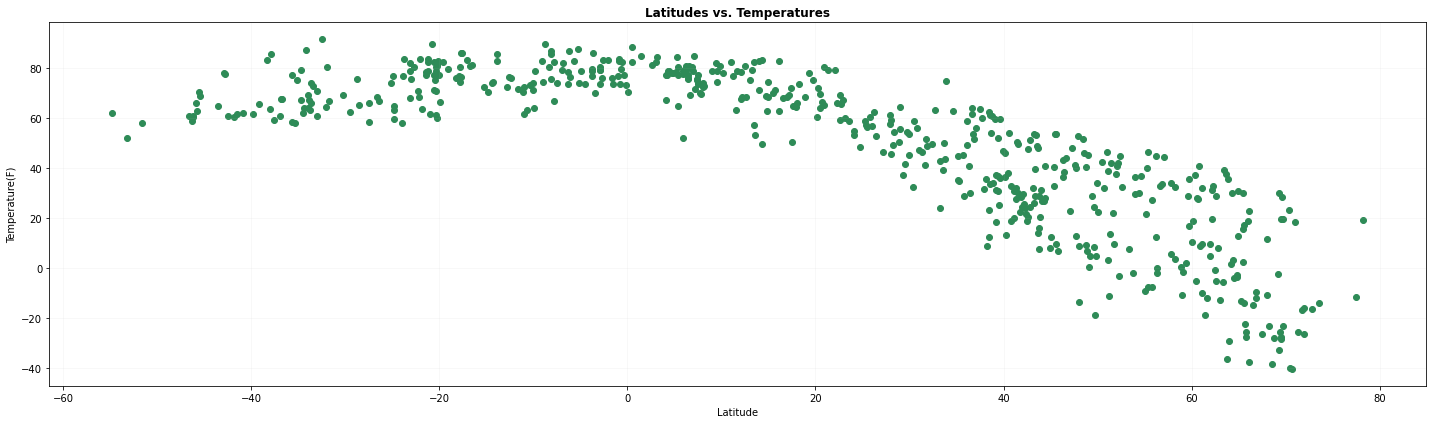

In [71]:
plt.figure(figsize=(20,6))

plt.scatter(df_sub.Latitude, df_sub.Max_Temp, color="seagreen")

plt.title ("Latitudes vs. Temperatures", fontweight="bold", fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()

plt.savefig("lat_vs_temps_ml.png")
plt.show()

## Latitude vs. Humidity Plot

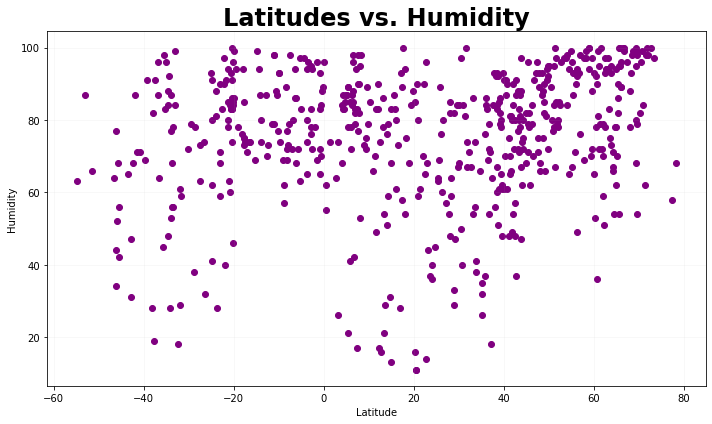

In [80]:
plt.figure(figsize=(10,6))

plt.scatter(df_sub.Latitude, df_sub.Humidity, color="purple")

plt.title ("Latitudes vs. Humidity", fontweight="bold", fontsize=24)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()

plt.savefig("lat_vs_humidities_ml.png")
plt.show()

## Latitude vs. Cloudiness Plot

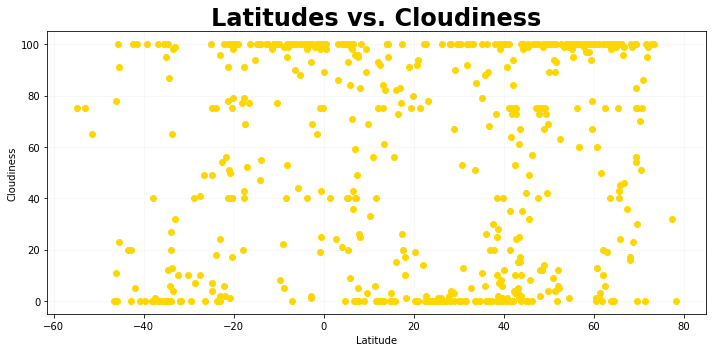

In [85]:
plt.figure(figsize=(10,5))

plt.scatter(df_sub.Latitude, df_sub.Cloudiness, color="gold")

plt.title ("Latitudes vs. Cloudiness", fontweight="bold", fontsize=24)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()

plt.savefig("lat_vs_cloudiness_ml.png")
plt.show()

## Latitude vs. Wind Speed Plot

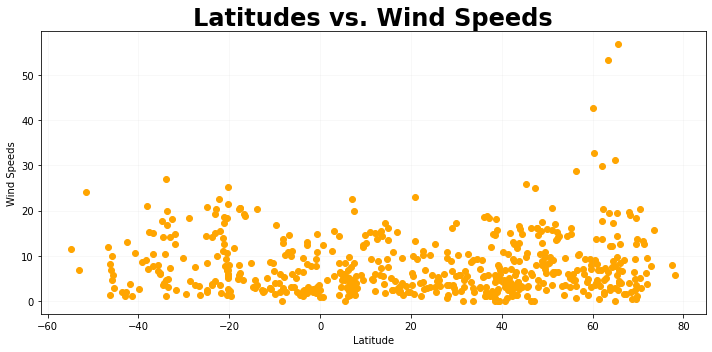

In [86]:
plt.figure(figsize=(10,5))

plt.scatter(df_sub.Latitude, df_sub.Wnd_Spd, color="orange")

plt.title ("Latitudes vs. Wind Speeds", fontweight="bold", fontsize=24)
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()

plt.savefig("lat_vs_wnd_spd_ml.png")
plt.show()

## Linear Regression

In [88]:
north = df_sub.loc[df_sub.Latitude >= 0]
south = df_sub.loc[df_sub.Latitude < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7464821650987101


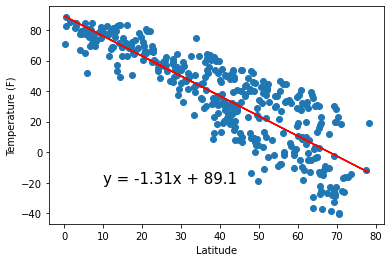

In [122]:
# Print out the r-squared value along with the plot.
x_values = north['Latitude']
y_values = north['Max_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [92]:
feature = north[["Latitude"]]
target = north["Max_Temp"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Max_Temp   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1142.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.12e-117
Time:                        20:58:18   Log-Likelihood:                -1622.4
No. Observations:                 390   AIC:                             3249.
Df Residuals:                     388   BIC:                             3257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.0975      1.710     52.109      0.000      85.736      92.459
Latitude      -1.3093      0.039    -33.800      0.000      -1.386      -1.233
==============================================================================
Omnibus:                        2.589   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                2.425
Skew:                          -0.124   Prob(JB):                        0.297
Kurtosis:                       2.704   Cond. No.                         95.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-1.30934127]
89.09753889610012


In [95]:
actual = north["Max_Temp"]
predictions = reg.predict(north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.7464821650987108
MSE: 240.35776369434942
RMSE: 15.50347585847604
MAE: 12.26680221568184


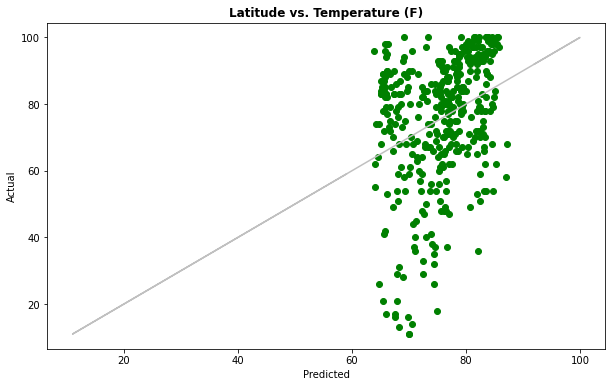

In [121]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="green")
plt.plot(actual, actual, color="silver")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Latitude vs. Temperature (F)", fontweight="bold")

plt.show()

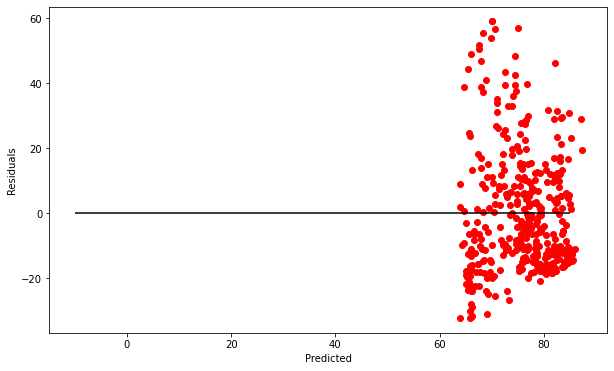

In [119]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="red")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2959140445444511


C:\Users\E5450\AppData\Local\Temp/ipykernel_23148/3696582323.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="green")


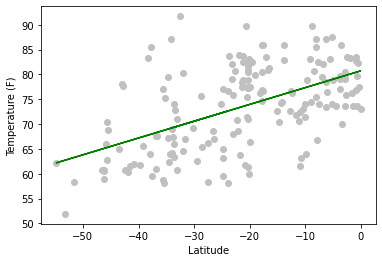

In [125]:
# Print out the r-squared value along with the plot.
x_values = south['Latitude']
y_values = south['Max_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="silver")
plt.plot(x_values,regress_values,"r-", color="green")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [126]:
feature = south[["Latitude"]]
target = south["Max_Temp"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Max_Temp   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     71.03
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.48e-14
Time:                        21:15:18   Log-Likelihood:                -578.36
No. Observations:                 171   AIC:                             1161.
Df Residuals:                     169   BIC:                             1167.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.7337      1.016     79.483      0.000      78.729      82.739
Latitude       0.3385      0.040      8.428      0.000       0.259       0.418
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.285
Skew:                           0.274   Prob(JB):                        0.319
Kurtosis:                       2.854   Cond. No.                         46.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.33848965]
80.73370762049068


In [128]:
actual = south["Max_Temp"]
predictions = reg.predict(south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.2959140445444507
MSE: 50.73213466995752
RMSE: 7.122649413663256
MAE: 5.822168716489721


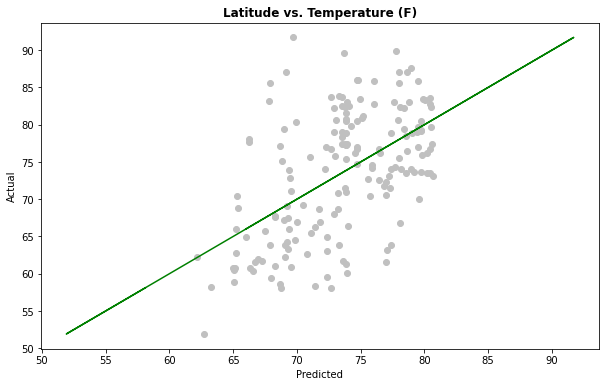

In [129]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="silver")
plt.plot(actual, actual, color="green")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Latitude vs. Temperature (F)", fontweight="bold")

plt.show()

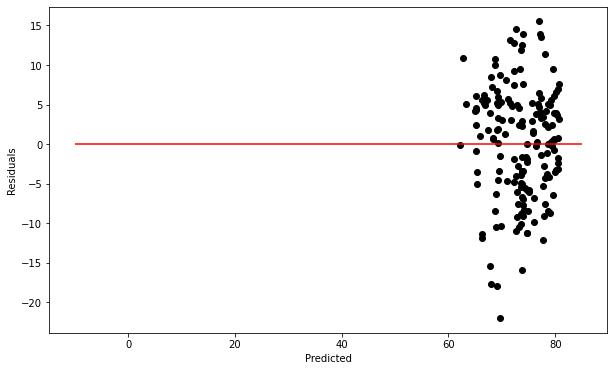

In [130]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="black")
plt.hlines(0, -10, 85, color="red")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09668295107092816


C:\Users\E5450\AppData\Local\Temp/ipykernel_23148/939276562.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="black")


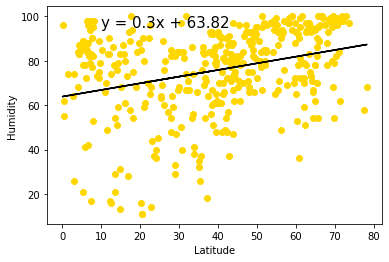

In [118]:
# Print out the r-squared value along with the plot.
x_values = north['Latitude']
y_values = north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="gold")
plt.plot(x_values,regress_values,"r-", color="black")

plt.annotate(line_eq,(10,95),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [104]:
feature = north[["Latitude"]]
target = north["Humidity"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     41.53
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           3.45e-10
Time:                        21:05:59   Log-Likelihood:                -1694.0
No. Observations:                 390   AIC:                             3392.
Df Residuals:                     388   BIC:                             3400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.8164      2.054     31.064      0.000      59.777      67.856
Latitude       0.2999      0.047      6.444      0.000       0.208       0.391
==============================================================================
Omnibus:                       51.979   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.003
Skew:                          -0.985   Prob(JB):                     1.04e-15
Kurtosis:                       3.606   Cond. No.                         95.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.29993955]
63.81639889436402


In [106]:
actual = north["Humidity"]
predictions = reg.predict(north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.09668295107092806
MSE: 346.9933338505469
RMSE: 18.627757080511515
MAE: 14.864865257586187


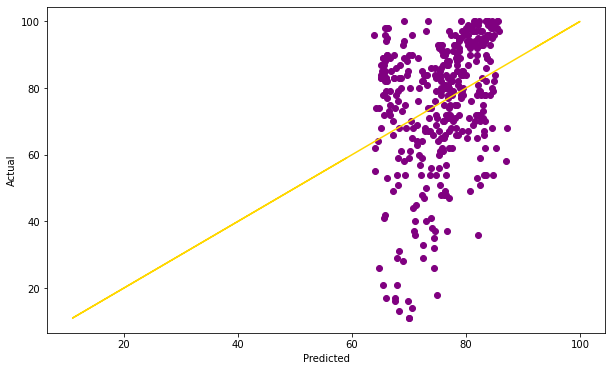

In [117]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="purple")
plt.plot(actual, actual, color="gold")

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

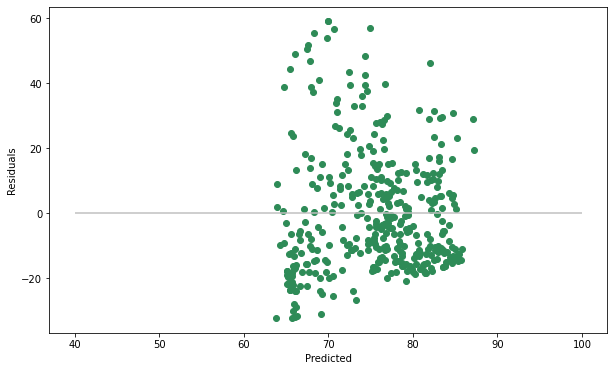

In [116]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="seagreen")
plt.hlines(0, 40, 100, colors="silver")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1345351586585916


C:\Users\E5450\AppData\Local\Temp/ipykernel_23148/1379896471.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="gold")


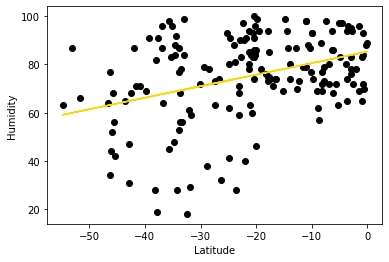

In [131]:
# Print out the r-squared value along with the plot.
x_values = south['Latitude']
y_values = south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="black")
plt.plot(x_values,regress_values,"r-", color="gold")

plt.annotate(line_eq,(10,95),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [133]:
feature = south[["Latitude"]]
target = south["Humidity"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     26.27
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           8.04e-07
Time:                        21:20:22   Log-Likelihood:                -722.52
No. Observations:                 171   AIC:                             1449.
Df Residuals:                     169   BIC:                             1455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3201      2.360     36.152      0.000      80.661      89.979
Latitude       0.4783      0.093      5.126      0.000       0.294       0.663
==============================================================================
Omnibus:                       16.607   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.363
Skew:                          -0.763   Prob(JB):                     0.000103
Kurtosis:                       3.498   Cond. No.                         46.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.47829974]
85.32008212632846


In [135]:
actual = south["Humidity"]
predictions = reg.predict(south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.13453515865859156
MSE: 273.8710673421044
RMSE: 16.549050345627222
MAE: 12.99535063274726


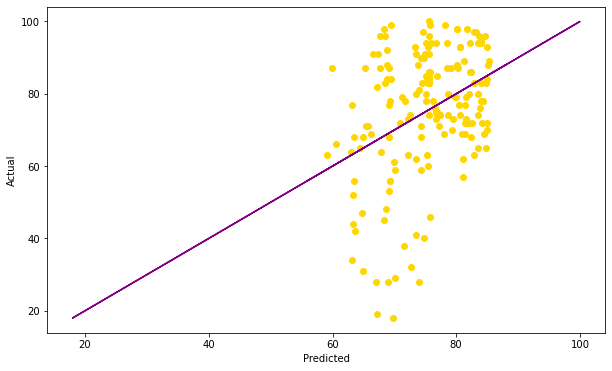

In [137]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="gold")
plt.plot(actual, actual, color="purple")

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

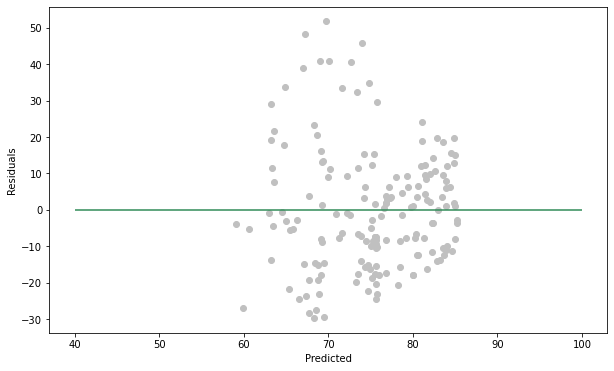

In [138]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="silver")
plt.hlines(0, 40, 100, colors="seagreen")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.023999636932286614


C:\Users\E5450\AppData\Local\Temp/ipykernel_23148/1673176421.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="silver")


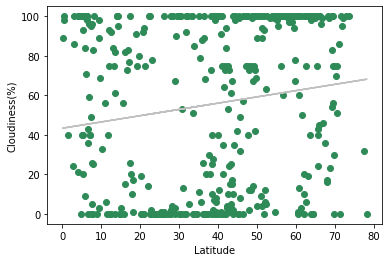

In [142]:
# Print out the r-squared value along with the plot.
x_values = north['Latitude']
y_values = north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="seagreen")
plt.plot(x_values,regress_values,"r-", color="silver")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [143]:
feature = north[["Latitude"]]
target = north["Cloudiness"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cloudiness   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     9.541
Date:                Sun, 06 Feb 2022   Prob (F-statistic):            0.00215
Time:                        21:30:52   Log-Likelihood:                -2002.5
No. Observations:                 390   AIC:                             4009.
Df Residuals:                     388   BIC:                             4017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.3504      4.532      9.566      0.000      34.441      52.260
Latitude       0.3171      0.103      3.089      0.002       0.115       0.519
==============================================================================
Omnibus:                     2574.112   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.988
Skew:                          -0.214   Prob(JB):                     1.03e-10
Kurtosis:                       1.373   Cond. No.                         95.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.31713221]
43.35041375078221


In [146]:
actual = north["Cloudiness"]
predictions = reg.predict(north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.023999636932286572
MSE: 1688.4545821802953
RMSE: 41.09080897451759
MAE: 38.200534122557485


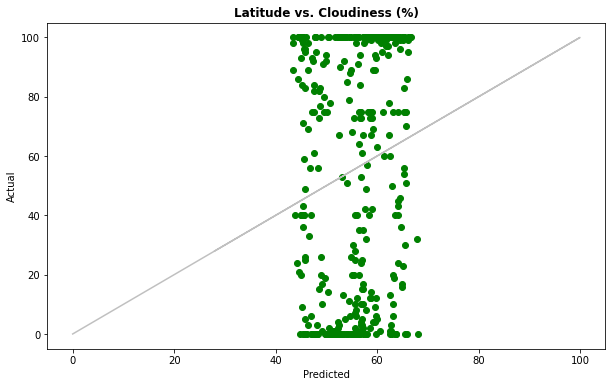

In [147]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="green")
plt.plot(actual, actual, color="silver")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Latitude vs. Cloudiness (%)", fontweight="bold")

plt.show()

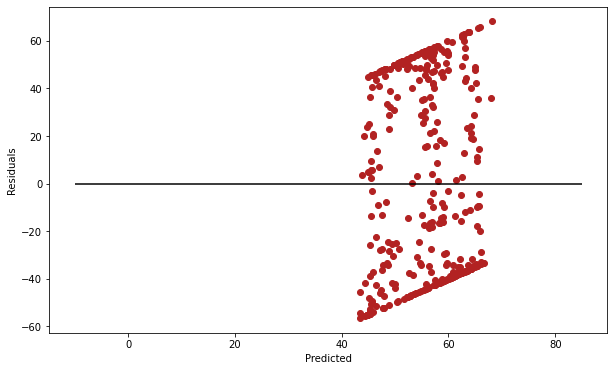

In [148]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="firebrick")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16503082837093705


C:\Users\E5450\AppData\Local\Temp/ipykernel_23148/3576113210.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="seagreen")


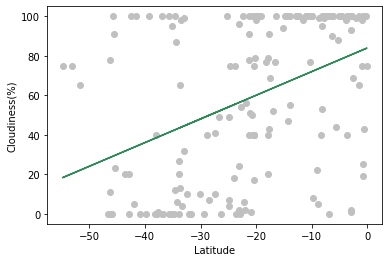

In [149]:
x_values = south['Latitude']
y_values = south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="silver")
plt.plot(x_values,regress_values,"r-", color="seagreen")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [150]:
feature = south[["Latitude"]]
target = south["Cloudiness"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cloudiness   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     33.40
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           3.53e-08
Time:                        21:34:29   Log-Likelihood:                -859.03
No. Observations:                 171   AIC:                             1722.
Df Residuals:                     169   BIC:                             1728.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.9972      5.243     16.020      0.000      73.646      94.348
Latitude       1.1983      0.207      5.780      0.000       0.789       1.608
==============================================================================
Omnibus:                       43.203   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.069
Skew:                          -0.144   Prob(JB):                       0.0107
Kurtosis:                       1.909   Cond. No.                         46.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[1.19827164]
83.99719346366145


In [152]:
actual = south["Cloudiness"]
predictions = reg.predict(south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.16503082837093697
MSE: 1351.911175569773
RMSE: 36.768344748843035
MAE: 32.58777350444117


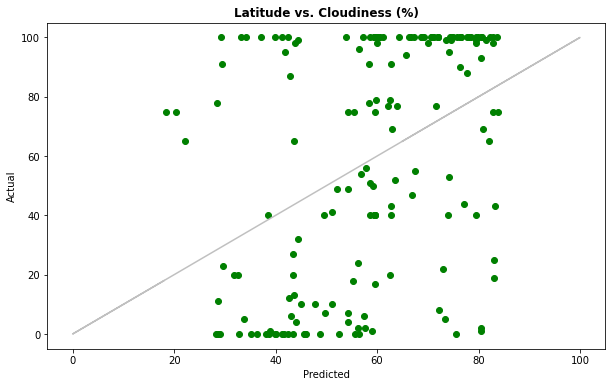

In [153]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="green")
plt.plot(actual, actual, color="silver")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Latitude vs. Cloudiness (%)", fontweight="bold")

plt.show()

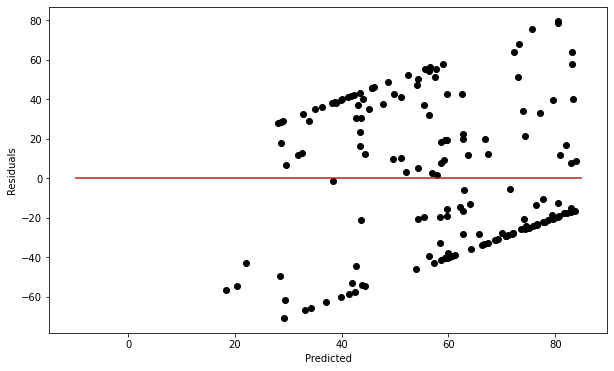

In [154]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="black")
plt.hlines(0, -10, 85, color="firebrick")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028380219252634335


C:\Users\E5450\AppData\Local\Temp/ipykernel_23148/3366406113.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="green")


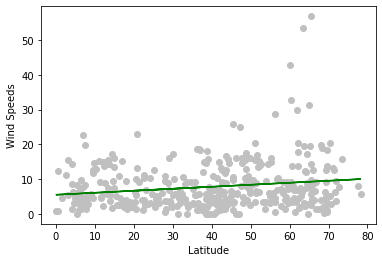

In [155]:
# Print out the r-squared value along with the plot.
x_values = north['Latitude']
y_values = north['Wnd_Spd']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="silver")
plt.plot(x_values,regress_values,"r-", color="green")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speeds')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [156]:
feature = north[["Latitude"]]
target = north["Wnd_Spd"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Wnd_Spd   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     11.33
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           0.000837
Time:                        21:38:15   Log-Likelihood:                -1303.0
No. Observations:                 390   AIC:                             2610.
Df Residuals:                     388   BIC:                             2618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5067      0.754      7.306      0.000       4.025       6.989
Latitude       0.0575      0.017      3.366      0.001       0.024       0.091
==============================================================================
Omnibus:                      239.073   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2419.180
Skew:                           2.463   Prob(JB):                         0.00
Kurtosis:                      14.162   Cond. No.                         95.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.05748886]
5.506663958318569


In [159]:
actual = north["Wnd_Spd"]
predictions = reg.predict(north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.028380219252634564
MSE: 46.710164828978165
RMSE: 6.834483508574599
MAE: 4.886337879961197


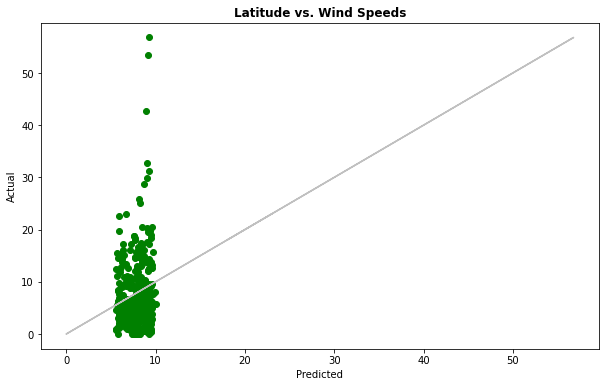

In [160]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="green")
plt.plot(actual, actual, color="silver")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Latitude vs. Wind Speeds", fontweight="bold")

plt.show()

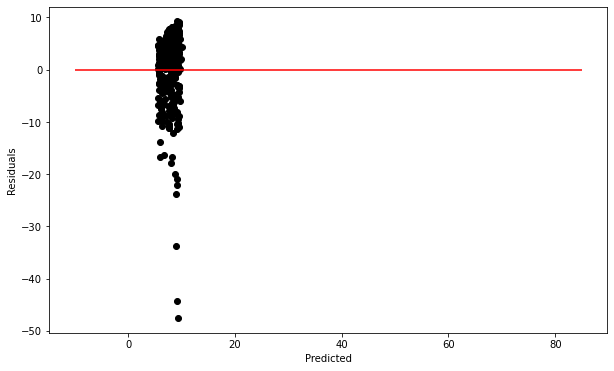

In [161]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="black")
plt.hlines(0, -10, 85, color="red")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026885158544069834


C:\Users\E5450\AppData\Local\Temp/ipykernel_23148/2626666351.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color="silver")


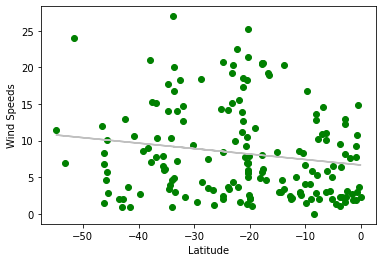

In [162]:
# Print out the r-squared value along with the plot.
x_values = south['Latitude']
y_values = south['Wnd_Spd']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="silver")

plt.annotate(line_eq,(10,-20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speeds')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [163]:
feature = south[["Latitude"]]
target = south["Wnd_Spd"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\E5450\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Wnd_Spd   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.669
Date:                Sun, 06 Feb 2022   Prob (F-statistic):             0.0321
Time:                        21:41:03   Log-Likelihood:                -552.70
No. Observations:                 171   AIC:                             1109.
Df Residuals:                     169   BIC:                             1116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6749      0.874      7.635      0.000       4.949       8.401
Latitude      -0.0747      0.035     -2.161      0.032      -0.143      -0.006
==============================================================================
Omnibus:                       17.393   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.604
Skew:                           0.844   Prob(JB):                     3.36e-05
Kurtosis:                       2.802   Cond. No.                         46.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-0.07469337]
6.674872714908851


In [165]:
actual = south["Wnd_Spd"]
predictions = reg.predict(south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.02688515854406992
MSE: 37.579224448396026
RMSE: 6.130189593185191
MAE: 5.056027811172196


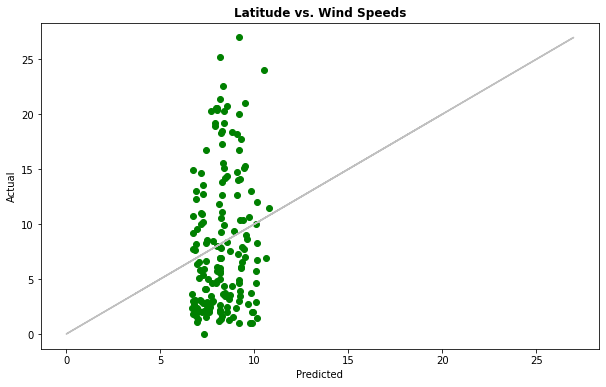

In [166]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual, color="green")
plt.plot(actual, actual, color="silver")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Latitude vs. Wind Speeds", fontweight="bold")

plt.show()

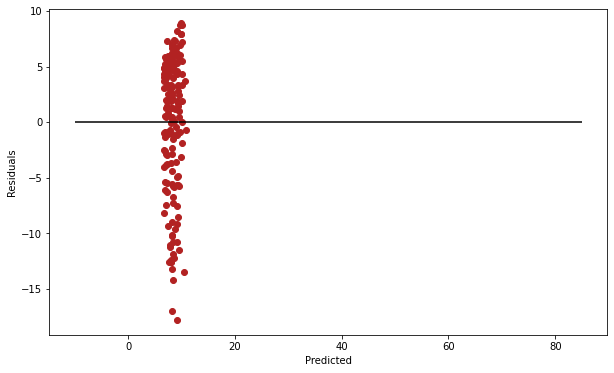

In [167]:

residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals, color="firebrick")
plt.hlines(0, -10, 85, color="black")

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()